Using Long Short Term Memory, creating a stock prediction model.
Predicting stocks for a single company over 'n' days.

In [67]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')


In [43]:
#getting stock quote
comp = input("Enter the stocks NASDAQ name  ")
df = web.DataReader(comp, data_source='yahoo', start='2012-01-01', end=date.today())
minVal = df.min()
maxVal = df.max()

print("History of Minimum Values")
print(minVal.round(2))
print("History of Maximum Values")
print(maxVal.round(2))
df

Enter the stocks NASDAQ name  ORCL
History of Minimum Values
High              26.23
Low               25.33
Open              25.54
Close             25.61
Volume       3331700.00
Adj Close         22.52
dtype: float64
History of Maximum Values
High         7.362000e+01
Low          7.200000e+01
Open         7.350000e+01
Close        7.264000e+01
Volume       1.576747e+08
Adj Close    7.264000e+01
dtype: float64


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.660000,25.830000,26.330000,25.860001,37911800.0,22.645048
2012-01-04,26.230000,25.549999,25.950001,26.010000,45418500.0,22.776394
2012-01-05,26.900000,25.910000,26.010000,26.590000,50873400.0,23.284300
2012-01-06,27.150000,26.360001,26.670000,26.930000,55685000.0,23.582022
2012-01-09,27.120001,26.660000,26.900000,27.030001,38481100.0,23.722450
...,...,...,...,...,...,...
2021-03-26,70.370003,68.279999,68.570000,70.250000,12617000.0,70.250000
2021-03-29,72.330002,70.169998,70.209999,71.129997,15183700.0,71.129997
2021-03-30,71.050003,69.949997,70.830002,70.550003,12000200.0,70.550003


In [58]:
startDate1 = date.today() - timedelta(days=11)
predWeek1 = web.DataReader(comp, data_source='yahoo', start=startDate1, end=date.today())
#print(predWeek1)
#print(predWeek1.mean().round(2))
openWeek1 = predWeek1['Open'].mean()
print(openWeek1)


68.89624977111816


In [60]:
startDate2 = startDate1 - timedelta(days=11)
predWeek2 = web.DataReader(comp, data_source='yahoo', start=startDate2, end=startDate1)
#print(predWeek2)
#print(predWeek2.mean().round(2))
openWeek2 = predWeek2['Open'].mean()
print(openWeek2)


66.81500053405762


In [61]:
if openWeek1 > openWeek2:
  print("Stock likely to go up, recommended buy")
else:
  print("Stock likely to drop, recommended to not buy shares")

Stock likely to go up, recommended buy


In [56]:
#creating rows and columns of Data set

df.shape

(2327, 6)

In [86]:
candleStickFig = go.Figure(data=[go.Candlestick(
                #x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
                ])
candleStickFig.update_layout(xaxis_rangeslider_visible=False)
candleStickFig.show()

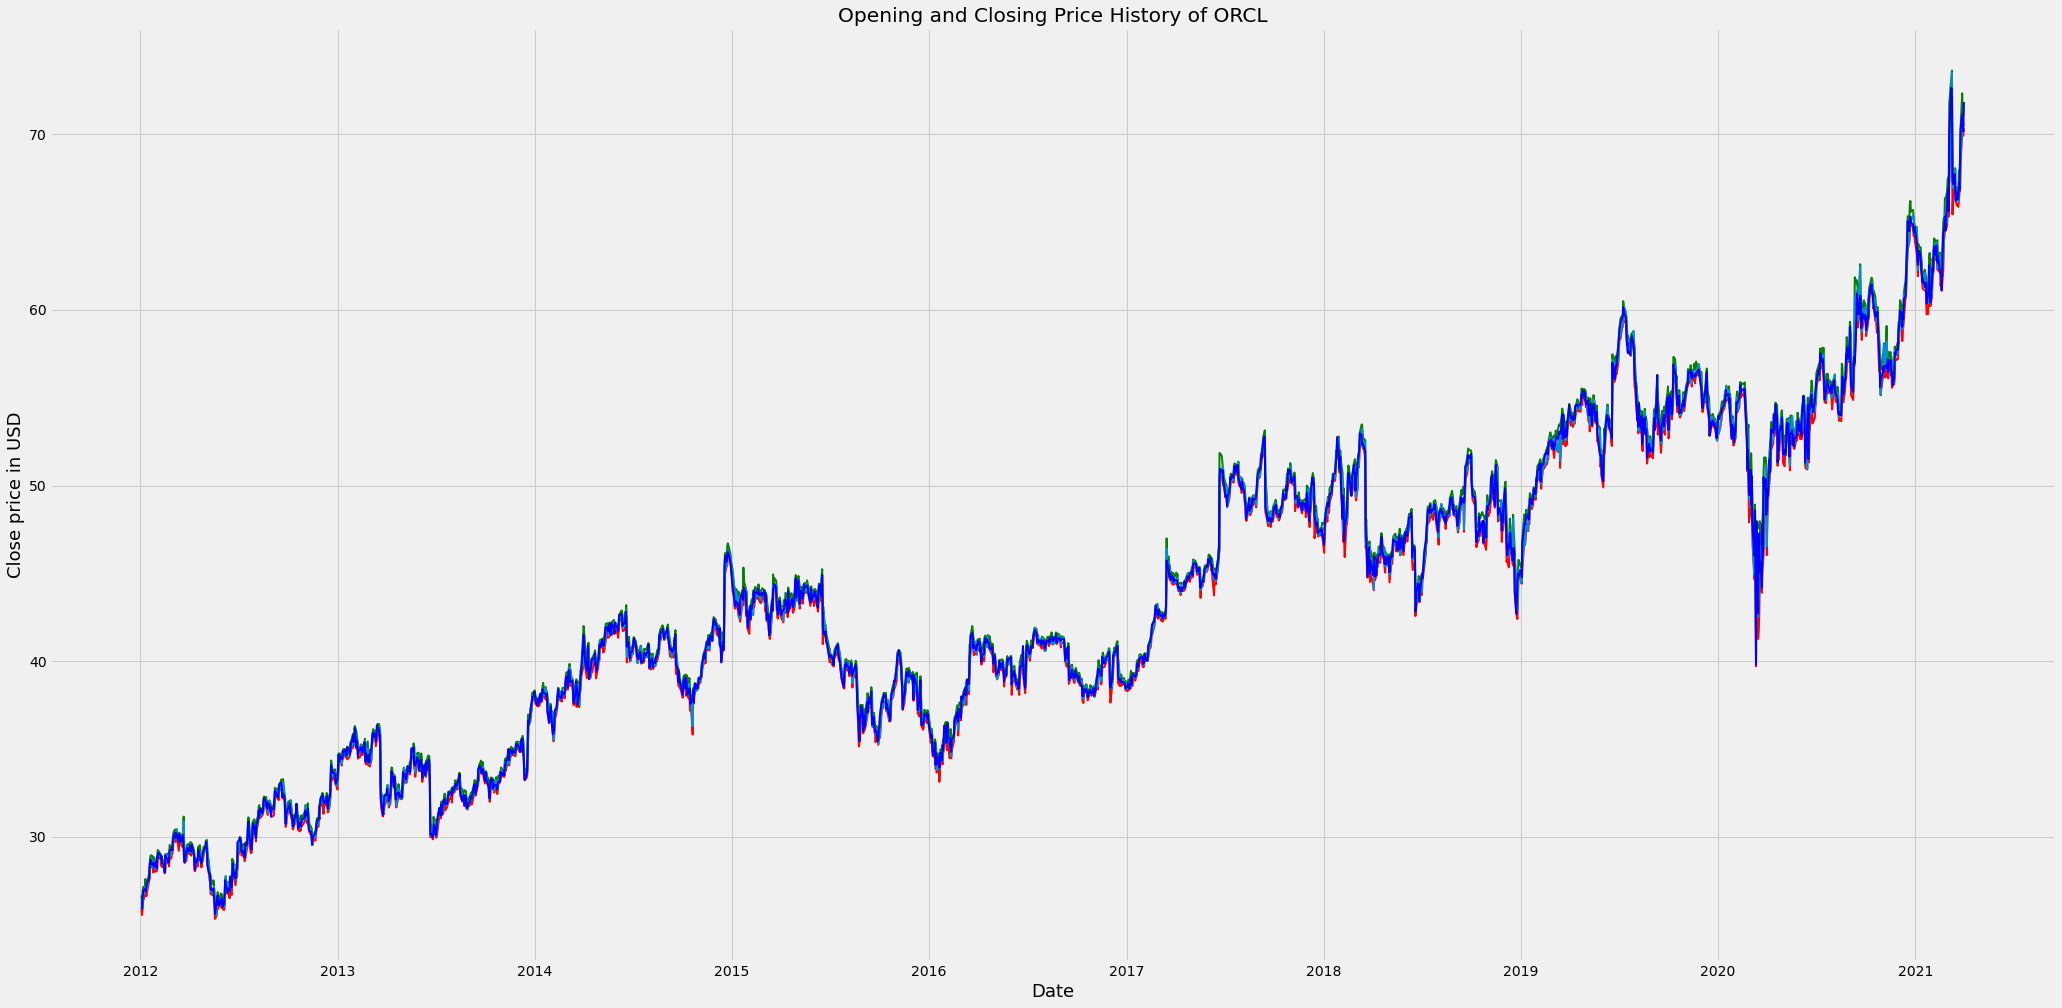

In [95]:
#visualsing the clsing price history
plt.figure(figsize=(32,16))
plt.title("Opening and Closing Price History of " + comp)
plt.plot(df['High'],'g',linewidth=2)
plt.plot(df['Low'],'r',linewidth=2)
plt.plot(df['Open'],linewidth=2)
plt.plot(df['Close'],'b',linewidth=2)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price in USD',fontsize=18)
plt.show()

In [45]:
#creating new dataframe with 'close' column

data = df.filter(['Close'])
dataset = data.values

#rows to train
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1862

In [6]:
#scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.50064852],
       [0.50843065],
       [0.5447471 ],
       ...,
       [0.22444489],
       [0.22307393],
       [0.22953696]])

In [7]:
#creating test and training dataset

train_data = scaled_data[0:training_data_len, :]

#splitting into x_train and y_train sets

x_train = []
y_train = []

for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.50064852, 0.50843065, 0.5447471 , 0.53177695, 0.54345008,
       0.54863814, 0.55252918, 0.55252918, 0.52918288, 0.52918288,
       0.5538262 , 0.55512325, 0.56679642, 0.55642027, 0.57587549,
       0.5966278 , 0.60440988, 0.5966278 , 0.58625168, 0.57846952,
       0.59273671, 0.59792477, 0.5966278 , 0.60440988, 0.60440988,
       0.60181585, 0.59014268, 0.57198448, 0.58754866, 0.58365757,
       0.56549937, 0.57587549, 0.57587549, 0.5680934 , 0.5538262 ,
       0.56031131, 0.57068743, 0.55512325, 0.55512325, 0.54863814,
       0.54734113, 0.53955904, 0.54345008, 0.53955904, 0.57717254,
       0.56290534, 0.56679642, 0.56420239, 0.57457851, 0.57328146,
       0.56031131, 0.56160829, 0.57068743, 0.56679642, 0.57068743,
       0.56420239, 0.57457851, 0.58884571, 0.59014268, 0.59403377])]
[0.6018158541900871]

[array([0.50064852, 0.50843065, 0.5447471 , 0.53177695, 0.54345008,
       0.54863814, 0.55252918, 0.55252918, 0.52918288, 0.52918288,
       0.5538262 , 0.55512325, 0.566

In [8]:
#converting the X-train and y_train models into numpy arrays to train thr model

x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#reshaping the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1802, 60, 1)

In [10]:
#building lSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1) 

1802/1802 [==============================] - 43s 22ms/step - loss: 0.0057


In [13]:
#creating testing data set

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [14]:
#convert to numpy array
x_test = np.array(x_test)

In [15]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [16]:
#get the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#finding the root mean squared error

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.4736547946929932

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


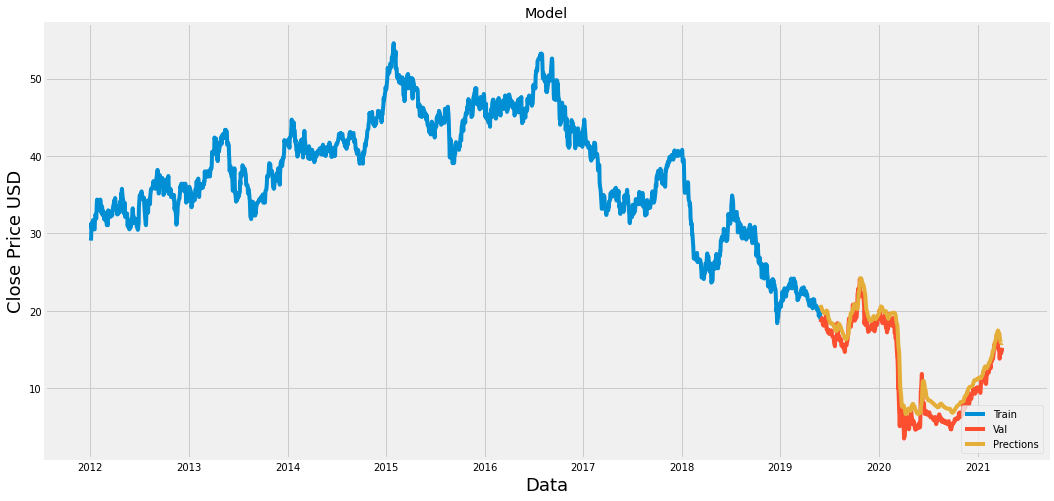

In [18]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualise 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Prections'],loc='lower right')
plt.show()

In [19]:
#predicted values
valid

,Close,Predictions
Date,,
2019-05-30,18.543047,20.773819
2019-05-31,18.741722,20.556787
2019-06-03,18.874172,20.360491
2019-06-04,19.072847,20.211130
2019-06-05,18.675497,20.126392
...,...,...
2021-03-26,14.850000,15.987964
2021-03-29,14.520000,15.876972
2021-03-30,14.970000,15.800809


In [20]:
#getting quote prices

quote = web.DataReader(comp, data_source='yahoo', start='2012-01-01', end=date.today())
new_df = quote.filter(['Close'])

last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[10.96416]]


In [21]:
quote2 = web.DataReader(comp, data_source='yahoo', start='2020-12-17', end=date.today())
print(quote2['Close'])

Date
2020-12-17     9.87
2020-12-18     9.60
2020-12-21     9.31
2020-12-22     9.35
2020-12-23     9.34
              ...  
2021-03-26    14.85
2021-03-29    14.52
2021-03-30    14.97
2021-03-31    14.90
2021-04-01    15.23
Name: Close, Length: 72, dtype: float64
